# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



**Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1



In [2]:
fc = pd.read_csv('food_claims_2212.csv')
fc

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


In [3]:
fc.info() # data type checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [4]:
fc.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


In [5]:
fc.duplicated().sum() # duplicate checking

0

In [6]:
fc.isnull().sum() # null checking

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [7]:
print(len(fc['claim_id'].unique()))
print(fc['location'].unique())
print(fc['linked_cases'].unique())
print(fc['cause'].unique())

2000
['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']
[False True nan]
['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']


In [8]:
# Fill missing value with median of amount_paid
fc['amount_paid'] = fc['amount_paid'].fillna(fc['amount_paid'].median())

In [9]:
# Null value checking
fc['amount_paid'].isnull().sum()

0

In [10]:
# Replace missing value with False
fc['linked_cases'] = fc['linked_cases'].fillna(False)

In [11]:
# Unique value checking
print(fc['linked_cases'].unique())

[False  True]


In [12]:
# Replace value " Meat" by "meat" in cause column
fc['cause'] = fc['cause'].replace(' Meat', 'meat')


In [13]:
# Replace value "VEGETABLES" by "vegetables" in cause column
fc['cause'] = fc['cause'].replace('VEGETABLES', 'vegetable')

In [14]:
print(fc['cause'].unique())

['unknown' 'meat' 'vegetable']


In [15]:
# Remove currency sign 
fc['claim_amount'] = fc['claim_amount'].str.strip('R$ ')

In [16]:
# convert data type from string to float
fc['claim_amount'] = pd.to_numeric(fc['claim_amount'])

In [17]:
print(fc['claim_amount'])

0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64


The dataset contains 8 columns with 2000 rows. There are no duplicate value, 36 missing values in **amount_paid** column and 26 missing values in **linked_cases** column. Detail of the columns described below:
- claim_id: 2000 unique ids
- time_to_close: positive numeric values
- claim_amount: "R" letter and currency sign with a space ' ' removed, the data type had been converted from string to float
- amount_paid: 36 missing values and been replaced by median of this column
- location: four unique values with non missing values
- individuals_on_claim: numeric values with non missing values
- linked_cases: 26 missing values and had been replaced by "False" value, and has 2 unique values "True" and "False"
- cause: 3 unique values after replace "Meat" by "meat" and "VEGETABLES" by "vegetable"


## Task 2

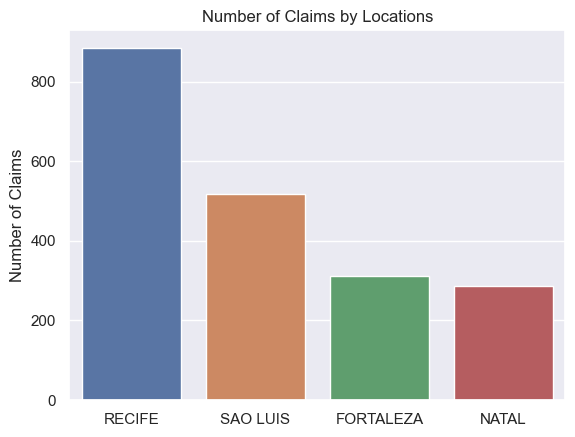

In [18]:
sns.set(style='darkgrid')
fx = sns.countplot(fc, x='location', order=fc['location'].value_counts().index)
plt.title('Number of Claims by Locations')
plt.ylabel('Number of Claims')
plt.xlabel(None)
plt.show()

The chart above illustrate the diverse of claims between locations.

Overall, RECIFE is the most claims location with over 800 claims, SAO LUIS is the second highest claims with about 500 claims, and FORTALEZA and NATAL have around 300 claims with NATAL is the lowest one.

As it is presented, the number of claims across the locations is unbalanced. 

## Task 3

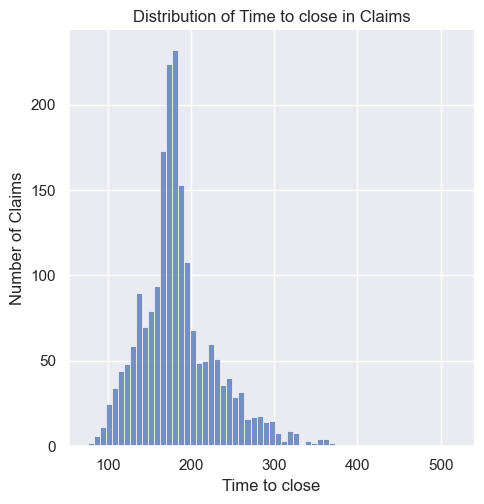

In [19]:
sns.set(style='darkgrid')
fx = sns.displot(fc, x='time_to_close')
plt.xlabel('Time to close')
plt.ylabel('Number of Claims') 
plt.title('Distribution of Time to close in Claims')
plt.show()

From the chart above, it is clearly that legal team the majority range of time to close of claims was between 150 and 250 days. 

There is notable exception in the claims with under 100 days and over 300 days to close, the legal team should check these claims and boost the time to close them to improve customer satisfication.

## Task 4

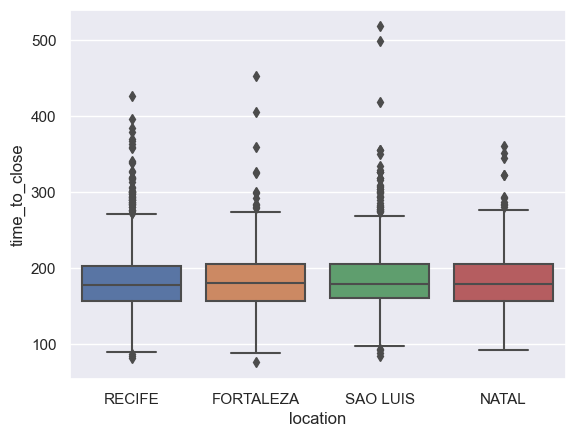

In [20]:
fx = sns.boxplot(fc, x='location', y='time_to_close')

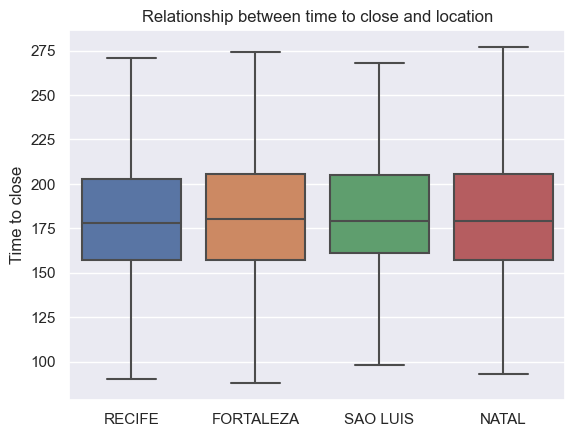

In [21]:
# Relationship between time to close and location after removed outliers
fx = sns.boxplot(fc, x='location', y='time_to_close', showfliers=False)
plt.xlabel(None)
plt.ylabel('Time to close')
plt.title('Relationship between time to close and location')
plt.show()

The chart above has been removed the outlier to focus on the main range of data. The average of time to close of each location share the same amount around 180 days. 

Dispite the similarity in average time to close, RECIFE has over 800 claims in 180 days which presented a high rate comparing to other location with almost a half of claims in RECIFE. 

The numerous claims in RECIFE requires staffs and resources from legal team to proceed than other location in the same amount of time, nearly 6 months.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam